# Hertzian conatct 1

## Assumptions
When two objects are brought into contact they intially touch along a line or at a single point. If any load is transmitted throught the contact the point or line grows to an area. The size of this area, the pressure distribtion inside it and the resulting stresses in each solid require a theory of contact to describe.

The first satisfactory theory for round bodies was presented by Hertz in 1880 who worked on it during his christmas holiday at the age of twenty three. He assumed that: 

The bodies could be considered as semi infinite elastic half spaces from a stress perspective as the contact area is normally much smaller than the size of the bodies, it is also assumed strains are small. This means that the normal integral equations for surface contact can be used:

The contact is also assumed to be frictionless so the contact equations reduce to:

$\Psi_1=\int_S \int p(\epsilon,\eta)ln(\rho+z)\ d\epsilon\ d\eta$ [1]

$\Psi=\int_S \int \frac{p(\epsilon,\eta)}{\rho}\ d\epsilon\ d\eta$ [2]

$u_x=-\frac{1+v}{2\pi E}\left((1-2v)\frac{\delta\Psi_1}{\delta x}+z\frac{\delta\Psi}{\delta x}\right) $ [3a]

$u_y=-\frac{1+v}{2\pi E}\left((1-2v)\frac{\delta\Psi_1}{\delta y}+z\frac{\delta\Psi}{\delta y}\right) $ [3b]

$u_z=-\frac{1+v}{2\pi E}\left(2(1-v)\Psi+z\frac{\delta\Psi}{\delta z}\right) $ [3c]

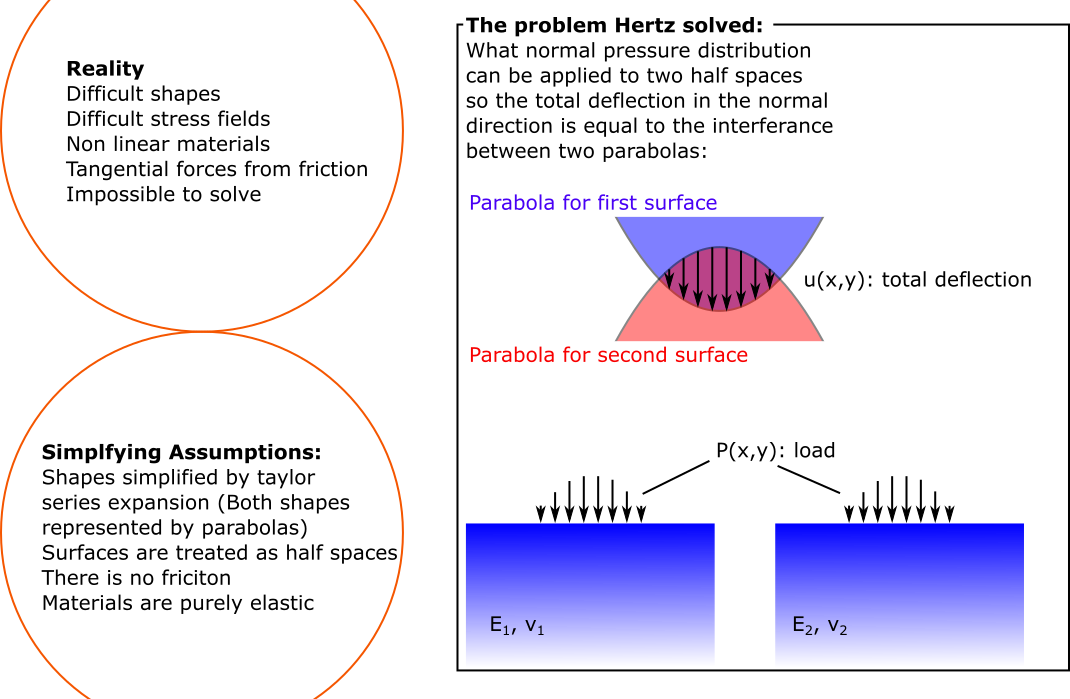

In [5]:
from IPython.display import Image
Image("figures/hertz_probelm reduction.png")

For the shape of the surfaces: it was asumed that they are smooth on both the micro scale and the macro scale. Assuming that they are smooth on the micro scale means that small irregulararities which would cause discontinuous contact and local pressure variations are ignored. 

## Geometry

Assuming that the surfaces are smooth on the macro scale implies that the surface profiles are continuous up to their second derivative. Meaning that the surfaces can be described by polynomials:

$z_1=A_1'x+B_1'y+A_1x^2+B_1y^2+C_1xy+...$ [4]

With higher order terms being neglected. By choosing the location of the origin to be at the point of contact and the orientation of the xy plane to be inline wiht the principal radii of the surface the equation above reduces to:

$z_1=\frac{1}{2R'_1}x_1^2+\frac{1}{2R''_1}y_1^2$ [5]

Where $R'_1$ and $R''_1$ are the principal radii of the first surface at the origin. 

### They are the maximum and minimum radii of curvature across all possible cross sections 

The following widget allows you to change the principal radii of a surface and the angle between it an the coordinate axes

In [100]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize'] = [15, 10]

In [101]:
@interact(r1=(-10,10),r2=(-10,10),theta=(0,np.pi),continuous_update=False)
def plot_surface(r1=5,r2=0,theta=0):
    """
    Plots a surface given two principal radii and the angle relative to the coordinate axes
    
    Parameters
    ----------
    r1,r2 : float
        principal radii
    theta : float
        Angle between the plane of the first principal radius and the coordinate axes
    """
    X,Y=np.meshgrid(np.linspace(-1,1,20),np.linspace(-1,1,20))
    X_dash=X*np.cos(theta)-Y*np.sin(theta)
    Y_dash=Y*np.cos(theta)+X*np.sin(theta)
    r1 = r1 if np.abs(r1)>=1 else float('inf')
    r2 = r2 if np.abs(r2)>=1 else float('inf')
    Z=0.5/r1*X_dash**2+0.5/r2*Y_dash**2
    
    x1=np.linspace(-1.5,1.5)
    y1=np.zeros_like(x1)
    z1=0.5/r1*x1**2
    
    y2=np.linspace(-1.5,1.5)
    x2=np.zeros_like(y2)
    z2=0.5/r2*y2**2
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z)
    
    ax.plot((x1*np.cos(-theta)-y1*np.sin(-theta)),x1*np.sin(-theta)+y1*np.cos(-theta),z1)
    ax.plot((x2*np.cos(-theta)-y2*np.sin(-theta)),x2*np.sin(-theta)+y2*np.cos(-theta),z2)
    
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-0.5, 0.5)

interactive(children=(IntSlider(value=5, description='r1', max=10, min=-10), IntSlider(value=0, description='r…

A similar equation defines the second surface:

$z_2=-\left(\frac{1}{2R'_2}x_2^2+\frac{1}{2R''_2}y_2^2\right)$ [6]

The separation between these surfaces is then given as $h=z_1-z_2$. 

by writing equation 4 and its counterpart on common axes, it is clear that the gap between the surfaces can be written as:

$h=Ax^2+By^2+Cxy$ [7]

And by a suitable choice of orientation of the xy plane the C term can be made to equal 0. As such when ever two surfaces with parabolic shape are brought into contact (with no load) the gap between them can be defined as a single parabola:

$h=Ax^2+Bx^2=\frac{1}{2R'_{gap}}x^2+\frac{1}{2R''_{gap}}y^2$ [8]

#### The values $R'_{gap}$ and $R''_{gap}$ are called the principal radii of relative curvature.

These relate to the principal radii of each of the bodies through the equations below:

$(A+B)=\frac{1}{2}\left(\frac{1}{R'_{gap}}+\frac{1}{R''_{gap}}\right)=\frac{1}{2}\left(\frac{1}{R'_1}+\frac{1}{R''_1}+\frac{1}{R'_2}+\frac{1}{R''_2}\right)$



The next widget shows the shpae of the gap between two bodies in contact allowing you to set the principal radii of each boday and the angle between them:

In [102]:
@interact(top_r1=(-10,10),top_r2=(-10,10),
           bottom_r1=(-10,10),bottom_r2=(-10,10),
           theta=(0,np.pi),continuous_update=False)
def plot_two_surfaces(top_r1=2,top_r2=5,bottom_r1=4,bottom_r2=-9,theta=0.3):
    """
    Plots 2 surfaces and the gap between them
    
    Parameters
    ----------
    top_r1,top_r2,bottom_r1,bottom_r2 : float
        The principal radii of the top and bottom surface
    theta : float
        The angel between the first principal radii of the surfaces
    """
    X,Y=np.meshgrid(np.linspace(-1,1,20),np.linspace(-1,1,20))
    X_dash=X*np.cos(theta)-Y*np.sin(theta)
    Y_dash=Y*np.cos(theta)+X*np.sin(theta)
    top_r1 = top_r1 if np.abs(top_r1)>=1 else float('inf')
    top_r2 = top_r2 if np.abs(top_r2)>=1 else float('inf')
    bottom_r1 = bottom_r1 if np.abs(bottom_r1)>=1 else float('inf')
    bottom_r2 = bottom_r2 if np.abs(bottom_r2)>=1 else float('inf')
    
    Z_top=0.5/top_r1*X_dash**2+0.5/top_r2*Y_dash**2
    Z_bottom=-1*(0.5/bottom_r1*X**2+0.5/bottom_r2*Y**2)
    
    
    fig = plt.figure()
    ax = fig.add_subplot(121, projection='3d')
    ax.set_title("Surfaces")
    ax2 = fig.add_subplot(122)
    ax2.set_title("Gap")
    ax2.axis("equal")
    ax2.set_adjustable("box")
    ax2.set_xlim([-1,1])
    ax2.set_ylim([-1,1])
    
    ax.plot_surface(X, Y, Z_top)
    ax.plot_surface(X, Y, Z_bottom)
    
    if top_r1==top_r2==bottom_r1==bottom_r2==float('inf'):
        ax2.text(s='Flat surfaces, no gap', x=-0.6, y=-0.1)
    else:
        ax2.contour(X,Y,Z_top-Z_bottom)
    
    
    div=((1/top_r2)-(1/top_r1))
    if div==0:
        lam=float('inf')
    else:
        lam=((1/bottom_r2)-(1/bottom_r1))/div
    beta=-1*np.arctan((np.sin(2*theta))/(lam+np.cos(2*theta)))/2
    if beta<=(np.pi/4):
        x=1
        y=np.tan(beta)
    else:
        x=np.tan(beta)
        y=1
    ax2.add_line(Line2D([x,-1*x],[y,-1*y]))
    beta-=np.pi/2
    if beta<=(np.pi/4):
        x=1
        y=np.tan(beta)
    else:
        x=np.tan(beta)
        y=1
    ax2.add_line(Line2D([x,-1*x],[y,-1*y]))

interactive(children=(IntSlider(value=2, description='top_r1', max=10, min=-10), IntSlider(value=5, descriptio…

From the form of equation 8 it is clear that the contours of constant gap (the contours plotted by the widget) are elipitcal in shape. With axes in the ratio $(R'_gap/R''_gap)^{1/2}$. In the special case of equal principal radii for each body (spherical contact) the contours of separation will be circular. From the symmetry of this problem it is clear that this will remain true when a load is applied. 

Additonally, when two cylinders are brought in to contact with their axes parallel the contours of separation are straight lines parallel to the axes of the cylinders. When loaded the cylinders will also make contact along a narrow strip parallel to the axes of the cylinders. 

We might expect, then that for the general case the contour of contact under load will follow the same eliptical shape as the contours of separation. This is infact the case but the proof will have to wait for the next section